In [ ]:
---
self-contained: true
---

# Practice Activity 8.2: Classification

Elizabeth Berry

GSB 544-01

11/17/23

### Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    roc_curve, auc, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [49]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = penguins.dropna()
penguins_dummies = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)
penguins_dummies.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,1,1


In [41]:
X = penguins_dummies.drop('species', axis=1)
y = penguins_dummies['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Define kNN models with different values of K
knn_model_1 = KNeighborsClassifier(n_neighbors=3)
knn_model_2 = KNeighborsClassifier(n_neighbors=5)

# Define decision tree models with different complexities
dt_model_1 = DecisionTreeClassifier(max_depth=3)
dt_model_2 = DecisionTreeClassifier(max_depth=5)

# Fit models
knn_model_1.fit(X_train_scaled, y_train)
knn_model_2.fit(X_train_scaled, y_train)
dt_model_1.fit(X_train_scaled, y_train)
dt_model_2.fit(X_train_scaled, y_train)

# Make predictions
knn_pred_1 = knn_model_1.predict(X_test_scaled)
knn_pred_2 = knn_model_2.predict(X_test_scaled)
dt_pred_1 = dt_model_1.predict(X_test_scaled)
dt_pred_2 = dt_model_2.predict(X_test_scaled)

# Evaluate models
models = [knn_model_1, knn_model_2, dt_model_1, dt_model_2]
predictions = [knn_pred_1, knn_pred_2, dt_pred_1, dt_pred_2]
model_names = ['kNN (K=3)', 'kNN (K=5)', 'Decision Tree (Depth=3)', 'Decision Tree (Depth=5)']

for model, pred, name in zip(models, predictions, model_names):
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\nClassification Report:")
    print(classification_report(y_test, pred))
    print("Overall Accuracy:", accuracy_score(y_test, pred))


Model: kNN (K=3)
Confusion Matrix:
[[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Overall Accuracy: 0.9701492537313433

Model: kNN (K=5)
Confusion Matrix:
[[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Overall

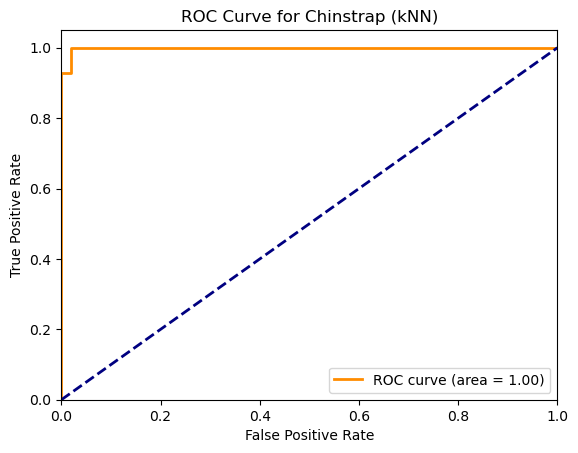

In [48]:
# ROC plot for the 'Chinstrap' class
fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=['Adelie', 'Chinstrap', 'Gentoo'])[:, 1], knn_model_1.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Chinstrap (kNN)')
plt.legend(loc="lower right")
plt.show()

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.